In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Linear regression with multiple variables

## Part 1. Explore Data Analysis

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices

In [5]:
path = "data\ex1data2.txt"
df = pd.read_csv(path, header=None, names=["size", "bedrooms", "price"])
df

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


#### Let zoom in houses which have price less than $250k

In [6]:
df[df.price < 250000]

,size,bedrooms,price
3,1416,2,232000
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500
10,1940,4,239999
17,1236,3,199900
22,1604,3,242900
25,1100,3,249900
31,1000,1,169900
35,1437,3,249900


From record 22, it costs **$242.9k$** for a house **1604 square feet** in size and **3 bedrooms**

In [7]:
df[df.price < 250000].describe()

,size,bedrooms,price
count,13.000000,13.000000,13.000000
mean,1332.923077,2.769231,222099.846154
std,278.125410,0.725011,27096.510233
min,852.000000,1.000000,169900.000000
25%,1203.000000,3.000000,199900.000000
50%,1380.000000,3.000000,232000.000000
75%,1437.000000,3.000000,242500.000000
max,1940.000000,4.000000,249900.000000


Look at this table, houses which have **1333 square feet** in size and approximate **2.7 bed rooms** will cost **$222k**

#### What about houses which cost more than $300k ?

In [8]:
df[df.price > 300000]

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
4,3000,4,539900
6,1534,3,314900
11,2000,3,347000
12,1890,3,329999
13,4478,5,699900
15,2300,4,449900
18,2609,4,499998


In [9]:
df[df.price > 300000].describe()

,size,bedrooms,price
count,23.000000,23.000000,23.000000
mean,2471.826087,3.347826,435343.347826
std,826.318486,0.714060,112639.821916
min,1458.000000,2.000000,314000.000000
25%,1945.000000,3.000000,337499.500000
50%,2238.000000,3.000000,399900.000000
75%,2804.500000,4.000000,519949.000000
max,4478.000000,5.000000,699900.000000


From this table, it is cost ~ **$435k** for houses which have approximinate **3.3 bed rooms** and **2471 square feet** size

> So, the more size and number of bedrooms, the more money.

#### Visualize data

Let's draw scatter plots of data to have an overal look.

C:\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


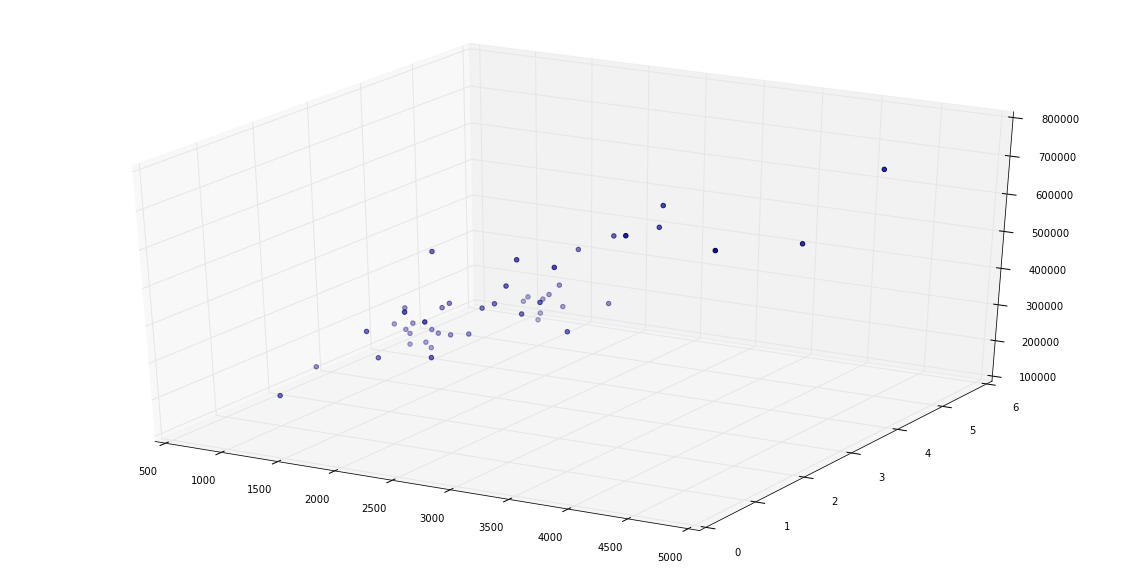

In [10]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['size'], df['bedrooms'], df['price'])

## Part 2. Model Building: Linear Regression Model

In the **Explore Data Analysis** part, we used some statistics and visualization to get insight about our data. In this part, we will fit our data to `linear regression model`.

### 2.1 Hypothesis function

Hypothesis is given by the linear model:

$$h_\Theta(x) = X^T \Theta = \Theta_0 + \Theta_1 x_1 + \Theta_2 x_2$$

With our data, $h_\Theta(x) = Price(size, bedrooms)$, $x_1 = size$ and $x_2 = bedrooms$, we can rewrite our hypothesis function:

$$Price(size, bedrooms) =\Theta_0 + \Theta_1 . size + \Theta_2 . bedrooms$$

In [11]:
def h(X, theta):
    X = (np.append(np.ones((len(X), 1)), X, axis=1))
    return np.dot(X, theta)

Give $size, bedrooms$ of a house and $\Theta_0, \Theta_1, \Theta_2$; we can predict its price.

For example, take $\Theta = (\Theta_0, \Theta_1, \Theta_2) = (2, 200, 2)$, and $\Theta = (\Theta_0, \Theta_1, \Theta_2) = (1, 150, 3)$

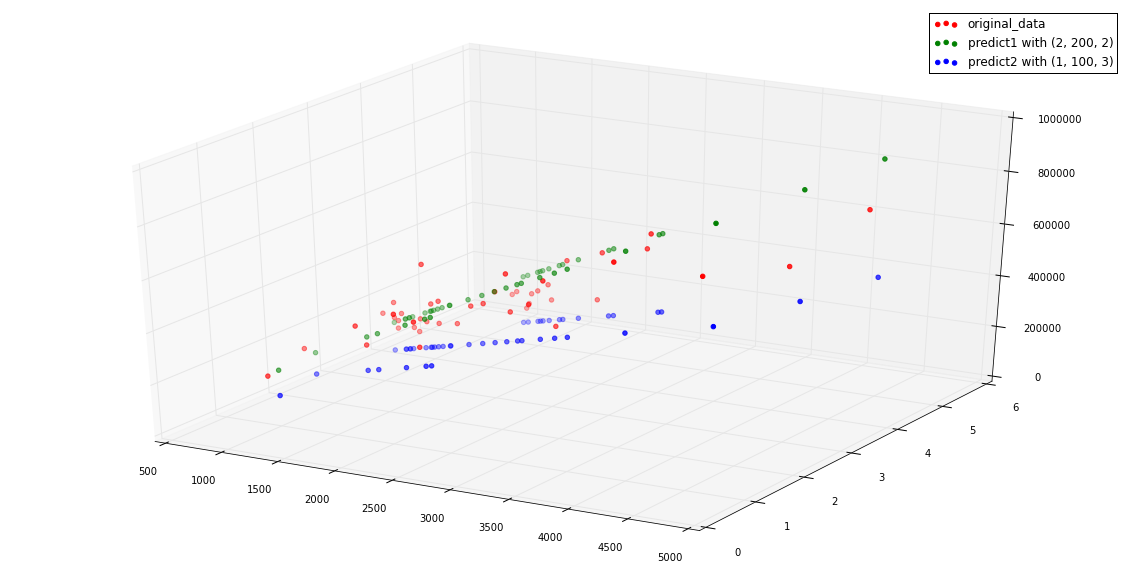

In [13]:
X = df.as_matrix()[:, :-1]
theta_example_1 = np.array([2, 200, 2])
predict1 = pd.DataFrame({"size": df.size, "bedrooms": df.bedrooms, "price": h(X, theta_example_1)})
theta_example_2 = np.array([1, 100, 3])
predict2 = pd.DataFrame({"size": df.size, "bedrooms": df.bedrooms, "price": h(X, theta_example_2)})

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['size'] - 100, df['bedrooms'], df['price'], color="red")
ax.scatter(predict1['size'], predict1['bedrooms'], predict1['price'], color="green")
ax.scatter(predict2['size'], predict2['bedrooms'], predict2['price'], color="blue")
ax.legend(("original_data", "predict1 with (2, 200, 2)", "predict2 with (1, 100, 3)"))

### Compute the cost

Cost Function

$$J(\Theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)} )^2$$

In [16]:
def compute_cost(X, y, theta):
    m = len(X)
    J = 1.0 / (2 * m) * sum(np.square(h(X, theta) - y))
    return J
y = df.iloc[:, -1].as_matrix()
compute_cost(X, y, theta_example_1)

5167039334.8404255

### Gradient 

The objective of linear regression is to minimize the cost function

$$J(\Theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)} )^2$$

where the hypothesis $h_\Theta(x)$ is given by the linear model

$$h_\Theta (x) = \Theta^T x = \Theta_0 + \Theta_1 x_1 + \Theta_2 x_2$$

# Train Model by sklearn

In [17]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

clf_linear = LinearRegression()
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]
clf_linear.fit(X_train, y_train)
print clf_linear.coef_
print clf_linear.intercept_
print clf_linear.score(X, y)

[  139.21067402 -8738.01911233]
89597.9095428
0.732945018029


Read more:

* https://github.com/mattnedrich/GradientDescentExample